# Distributions and Correlations

This notebook will teach you how to explore the key statistical characteristics of data sets. It covers the following topics:

- Mean, mode, median and variability
- Distribution shapes (symmetric, skewed, uniform, bimodal), 
- Impact of outliers
- Pearson correlation coefficients between variables
- Assessing the linearity of a relationship between variables.
- Checking if a given dataset is normally distributed or not.

It will also teach you how to use the `groupby` function to summarize data.


In [3]:
# First, we need to set things up to tell Pandas to hide well meant but 
# annoying warnings that a feature we want to use might become
# deprecated in the near future. Do this *before* you import Pandas.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Used for the correlation matrix.
import statsmodels.api as sm # Used for QQ plots.
from scipy import stats


## Dataset: heatpump data

We will be using a dataset containing energy consumption data for a heat pump. It contains the following columns:

- timestamp: timestamp
- E_apparaten: energy use of other devices in kWh
- E_warmtepomp: energy use of heatpump in kWh
- E_verbruik: total energy use in kWh
- Overschot: energy returned to grid
- hp_AAN: heatpump on or off
- diff_temp_woonk: temperature living room
- diff_temp_slaapk: temperature bedroom
- Tussendeur: inside door open / closed
- Buitendeur: outside door open / closed
- Raam: window open / closed
- Dag: weekday
- day_of_week: weekday (same as "Dag")
- month: month
- year: year

In [4]:
# Read in the data
dfhp = pd.read_csv("../data/heatpump_clean_filtered.csv")
dfhp

,timestamp,E_apparaten,E_warmtepomp,E_verbruik,overschot,hp_AAN,diff_temp_woonk,diff_temp_slaapk,Tussendeur,Buitendeur,Raam,Dag,day_of_week,month,year
0,2019-11-30 21:00:00,0.000000,0.000000,0.000000,0.000000,0.0,19.300000,17.800000,1.0,0.0,0.0,5,5,11,2019
1,2019-11-30 21:30:00,0.012299,0.455955,0.468254,0.000000,1.0,19.594167,18.094167,1.0,0.0,0.0,5,5,11,2019
2,2019-11-30 22:00:00,0.012543,0.464996,0.477539,0.000000,1.0,20.286389,18.884444,1.0,0.0,0.0,5,5,11,2019
3,2019-11-30 22:30:00,0.023764,0.538520,0.562284,0.000000,1.0,20.790278,19.390278,1.0,0.0,0.0,5,5,11,2019
4,2019-11-30 23:00:00,0.085571,0.608624,0.694196,0.000000,1.0,19.427222,18.223333,1.0,0.0,0.0,5,5,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10244,2020-07-01 07:00:00,0.102798,0.002612,0.105410,0.000000,1.0,6.000000,6.600000,0.0,0.0,0.0,2,2,7,2020
10245,2020-07-01 07:30:00,0.092111,0.010005,0.102116,0.000000,1.0,5.947889,6.521833,0.0,0.0,0.0,2,2,7,2020
10246,2020-07-01 08:00:00,0.093163,0.007402,0.100565,0.001018,1.0,5.800000,6.300000,0.0,0.0,0.0,2,2,7,2020
10247,2020-07-01 08:30:00,0.088124,0.002610,0.090734,0.034967,1.0,5.646187,6.146187,0.0,0.0,0.0,2,2,7,2020


## Recap: mean, mode, median and variability

Functions for calculating the mean, median and variability (or standard deviation, which is more convenient) of a a set of numbers can be found in the `numpy` package.

There is no "mode" function in numpy.

In [5]:
# Statistics functions can be found in numpy:
print(f'Mean: {np.mean([1, 2, 3, 4, 5])}')
print(f'Median: {np.median([1, 1, 2, 3, 3])}')
print(f'Variance: {np.var([1, 1, 1, 1, 1, 1, 2])}')
print(f'Standard deviation: {np.std([1, 2, 3, 4, 5])}')
# However, there is no "mode" function!
# Nope: print(f'Mode: {np.mode([1, 2, 2, 3, 4])}')

Mean: 3.0
Median: 2.0
Variance: 0.12244897959183675
Standard deviation: 1.4142135623730951


In [6]:
# However, Pandas is nice enough to wrap these numpy functions so we can use them directly on our data frames:
print(f'Mean energy consumption: {dfhp['E_verbruik'].mean()}')
print(f'Median energy consumption: {dfhp['E_verbruik'].median()}')
print(f'Variance in energy consumption: {dfhp['E_verbruik'].var()}')
print(f'Energy consumption standard deviation: {dfhp['E_verbruik'].std()}')

Mean energy consumption: 0.2896702229964174
Median energy consumption: 0.3158775840438466
Variance in energy consumption: 0.02968122693230563
Energy consumption standard deviation: 0.1722824045928824


Pandas also has a convenient function that describes an entire data set with a single command:

In [7]:
# Command for describing an entire data set (also works on a single column).
dfhp.describe()

,E_apparaten,E_warmtepomp,E_verbruik,overschot,hp_AAN,diff_temp_woonk,diff_temp_slaapk,Tussendeur,Buitendeur,Raam,Dag,day_of_week,month,year
count,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000,10249.000000
mean,0.083537,0.206134,0.289670,0.237514,0.999902,10.913430,9.020691,0.067811,0.095034,0.250463,2.989950,2.989950,4.744951,2019.854230
std,0.057391,0.172998,0.172282,0.419715,0.009878,5.576968,5.142348,0.251434,0.293276,0.433301,2.010365,2.010365,3.389054,0.352893
min,-0.215998,0.000000,-0.212472,0.000000,0.000000,-9.090117,-10.168333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2019.000000
25%,0.048700,0.010010,0.118801,0.000000,1.000000,7.652526,6.495614,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2020.000000
50%,0.080578,0.237776,0.315878,0.002295,1.000000,11.947830,9.678827,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,2020.000000
75%,0.102569,0.341597,0.411410,0.282229,1.000000,14.900000,12.440873,0.000000,0.000000,1.000000,5.000000,5.000000,6.000000,2020.000000
max,1.348056,0.996969,1.357693,2.067762,1.000000,24.827620,24.232867,1.000000,1.000000,1.000000,6.000000,6.000000,12.000000,2020.000000


## Distributions and distribution shapes

Looking at the numbers for the energy consumption column for all devices including the heat pump (E_verbruik) what can we tell about the way these values are distributed? Compare the mean to the standard deviation (std).

Further investigation is warranted. Plot a histogram of the E_verbruik column. Increase the number of bins until can confidently describe the shape of the distribution for this variable.

Also spend some time thinking about what the shape of this distribution tells us about the data.

In [ ]:
# Your code goes here.



## Outliers

Examine the histogram. Do you detect any outliers? What is their effect on the shape of the distribution? Can you think of a different graph type to make it more obvious that these are, indeed, outliers?

In [ ]:
# Place your code here for a graph that makes it more obvious that we're dealing with outliers.



Spend some time thinking about what these outliers could be. Do you want to remove them from the data set or do you want to keep them in?

### What is an outlier anyway?

For normally distributed samples, the data points that matplotlib box plots mark as outliers lie beyond what is called IQR (interquartile range) times 1.5 added to the third quartile point (Q3). In many cases, this range is small enough that treating these data points as outliers is sensible.

<img src="img/boxplot_ranges.png" width="25%" title="Box plot ranges vs normal distribution" />


<small>Relationship between the normal distribution and box plots. Source: https://commons.wikimedia.org/wiki/File:Boxplot_vs_PDF.svg</small>

However, not all distributions are normally distributed. Let's take a look at the distribution of the E_warmptepomp variable that records the energy use of the heat pump itself.


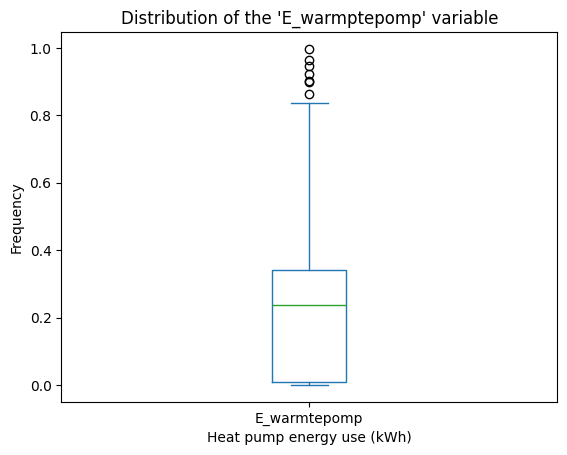

In [8]:
# The distribution of the E_warmtepomp variable (heat pump energy use.)
dfhp['E_warmtepomp'].plot.box(title="Distribution of the 'E_warmptepomp' variable", xlabel="Heat pump energy use (kWh)", ylabel="Frequency")
plt.show()


Clearly this distribution is skewed. Throughout most of the recorded period the heat pump used comparatively little energy and in a small but wide range it used a lot more. Why?

Plot a histogram of the E_warmtepomp variable to take a closer look at the variable. Play with the bins setting until you feel confident you have a clear picture of the distribution shape.

In [ ]:
# Your code goes here.


### Is it safe to throw the outliers out?
The number of data points where energy used is high is small, but at these points the amount of energy used is more than twice the median value. Since energy used is what one tends to be interested in when looking at heat pump data, it's instructive to calculate the total percentage of energy used by the data points in question. This tells us what the **impact** is of the outliers on the entire data set.

The code for this is below. Play around with the cutoff variable to determine at what point discarding outliers is safe.

In [9]:
# Let's calculate how much of the energy use of the heat pump is caused by the so-called outliers
# Note the use of a variable to allow us to play around with the settings without changing the formula code.
# Note also the use of exceptionally long variable names. These are terrible to type, but make the code
# much, much easier to read. This is important when you revisit your code at some later date and you've
# forgotten how it works.
cutoff = 0.8 # Value above which a datapoint is considered to be an outlier

outlier_energy_usage = dfhp['E_warmtepomp'].loc[(dfhp['E_warmtepomp'] > cutoff)].sum()
non_outlier_energy_usage = dfhp['E_warmtepomp'].loc[(dfhp['E_warmtepomp'] <= cutoff)].sum()
outlier_energy_usage_percentage = 100.0 * (outlier_energy_usage / (outlier_energy_usage + non_outlier_energy_usage))
print(f"Outliers above cutoff value of {cutoff} kWh use {outlier_energy_usage_percentage : .2f}% of the total energy used.")


Outliers above cutoff value of 0.8 kWh use  0.39% of the total energy used.


What do you think? Should we throw the outliers out or should we leave them in?

## Calculating correlation

Since we're dealing with heat pump energy use data, a sensible hypothesis would be that energy use is in some way related to the outside temperature.

Unfortunately, this is not available to us. We'll have to make do with:

- diff_temp_woonk: temperature living room (difference with outside temperature)
- diff_temp_slaapk: temperature bedroom (difference with outside temperature)

Let's pick the temperature of the living room. Plot the relationship between E_warmtepomp (energy usage) and living room temperature using a scatter plot.

In [ ]:
# Your code goes here:



There seems to be some sort of relationship but there is a lot of variation in the data suggesting there is more going on than simply "temperature goes up, energy use down" (remember that the temperature columns record the *difference* between the outside temperature and the inside temperature, so higher values mean the outside temperature is colder).

What could account for the variation? One possible answer is that the heat pump only uses energy when it needs to do some work. However, it does not need to do this continuously, even on very cold days. Walls and furniture retain heat, so once they're properly heated up, the heat pump can scale back.

To test the hypothesis that the heat pump does not work continuously, let's draw a line graph of its energy use. Since there are more than 100,000 records, plotting *all* values is not a good idea. Instead, plot data for, say, the first seven days of month of February in 2020.

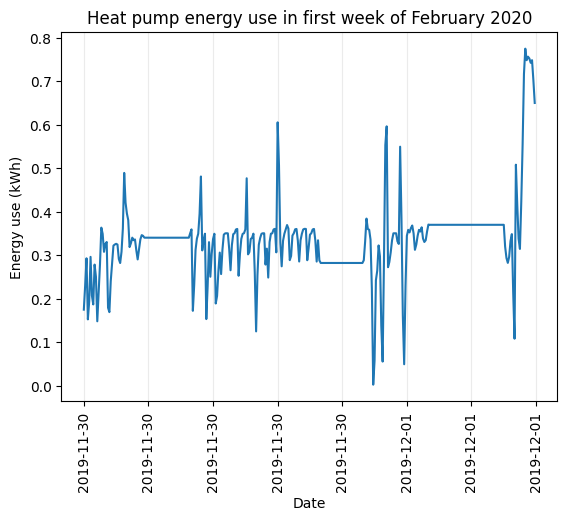

In [10]:
# The data set does not contain day numbers (only week day numbers).
# We need to convert the "Timestamp" column to a proper timestamp datatype
# so we can extract the day of the month from it.
dfhp['ts_fixed'] = pd.to_datetime(dfhp['timestamp'])
dfhp['day_month'] = dfhp['ts_fixed'].dt.day
# To make nicer x axis labels, create a column containing the date only, as a string.
dfhp['date_string'] = dfhp['year'].astype('str') + '-' + dfhp['month'].astype('str').str.zfill(2)  + '-' + dfhp['day_month'].astype('str').str.zfill(2)
                        

# Which year to show?
year = 2020
# Which month to show?
month = 2
# How many days to show?
num_days = 7

# Looking at the CSV data, we know there are data points recorded every 30 minutes.
# Use this knowledge to set the number of data points per day. We need this to create a readable x axis.
num_ticks_day = 48 # 24 * 2 data points per hour.

dfhp_feb_wk1 = dfhp.loc[(dfhp['year'] == year) & (dfhp['month'] == month) & (dfhp['day_month'] <= num_days)]
fig, ax = plt.subplots()
plt.plot(dfhp_feb_wk1['timestamp'], dfhp_feb_wk1['E_warmtepomp'])
ax.set_title("Heat pump energy use in first week of February 2020")
ax.set_ylabel("Energy use (kWh)")
ax.set_xlabel("Date")

# Make the x axis readable.
import matplotlib.ticker as ticker
# Use the nicely formatted date for the labels. Doing it this way
# causes a warning. This is ugly, so supress it. Notice we only supress 
# warnings temporarily
import warnings
warnings.filterwarnings("ignore")
ax.set_xticklabels(dfhp['date_string']) # Use the nicely formatted date for the labels.
warnings.filterwarnings("default") # Stop hiding warnings
# We *do*, however, want to hide Pandas' future warnings (see above.)
warnings.simplefilter(action='ignore', category=FutureWarning)

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=num_ticks_day))
ax.tick_params(axis = 'x', labelrotation = 90)

# Normally we do not want to see a grid because it's distracting.
# In this case, marking off individual days is actually helpful, so show them.
plt.grid(visible = True, which = 'major', axis = 'x', alpha = 0.25)

plt.show()


Heat pump energy usage fluctuates during the day. This means the individual data points are not really usable.

What we need to do is summarize the data in some way. For this we're going to use the - very powerful - Pandas `groupby` feature.

### Summarizing data using groupby

As said, individual data points are not really useful if we want to study correlations between energy use and the other variables. It's much more useful to look at energy use for an entire day. What we want to do is to sum all the readings for a specific day. This gives us the total energy use for that day.

When we do this, we also need to think about what we need to do with the living room temperature. Should we sum that too? Or should we take the average? How about the minimum and the maximum values?

Let's just calculate all of those values so we are free to pick the most useful one later.

To summarize values like this, we need to use the `groupby` feature of Pandas. `groupby` works as follows: 
1. You tell Pandas which column contains the values you want to group by.
2. You tell Pandas which function you want to use to summarize the values in the other columns for each group: `min()`, `max()`, `sum()`, `mean()`, etc.

The result is a grouped data frame with multiple levels, as we see here.

In [11]:
# First we need to create a new data frame that contains only the columns we want.
# The reason we need to do this is that the original data set contains columns that
# can not be summarized using min(), max(), sum() etc (there is no such thing as 
# a sum of multiple time stamps, for example).
dfhp_summary = dfhp[['date_string', 'E_warmtepomp', 'diff_temp_woonk']]
dfhp_summary.groupby(by='date_string').sum() # Summing temperatures is nonsense, of course, but for this example we don't care.

,E_warmtepomp,diff_temp_woonk
date_string,,
2019-11-30,2.570234,119.582500
2019-12-01,30.729847,946.442791
2019-12-02,24.642481,829.882652
2019-12-03,18.580892,732.335456
2019-12-04,20.895484,864.947363
...,...,...
2020-06-27,1.119869,94.258613
2020-06-28,0.820068,284.394612
2020-06-29,1.349858,323.214165


As you see, the output of the `groupby` function is a data frame with two header rows. This might become inconvenient later, but for now we're going to ignore this.

We have a more pressing problem: while the `sum` function is great for summarizing energy use per day, summing temperatures for a whole day is nonsense. What we want instead is to use a different summary function for the temperature. Let's say we take the arithmetic mean for now.

In [12]:
# Using multiple aggregation functions. Notice use of NumPy functions instead
# of Pandas functions for sum and mean
dfhp_summary.groupby(by='date_string').agg(
    total_energy = ('E_warmtepomp', np.sum),
    avg_temp_diff = ('diff_temp_woonk', np.mean)
)

,total_energy,avg_temp_diff
date_string,,
2019-11-30,2.570234,19.930417
2019-12-01,30.729847,19.717558
2019-12-02,24.642481,17.289222
2019-12-03,18.580892,15.256989
2019-12-04,20.895484,18.019737
...,...,...
2020-06-27,1.119869,1.963721
2020-06-28,0.820068,5.924888
2020-06-29,1.349858,6.733628


Now make a new scatter plot that shows the relationship between energy use and temperature.

In [13]:
# Make a new data frame containing the summary
df_summ = dfhp_summary.groupby(by='date_string').agg(
    total_energy = ('E_warmtepomp', np.sum),
    avg_temp_diff = ('diff_temp_woonk', np.mean)
)
# Your code goes here:




Much better. There seems to be a clear relationship between temperature and energy use (it's inverted because the temperature is the *difference* between inside and outside temperatures).

### Pearson's correlation coefficient

How strong is the relationship between temperature difference and energy use?

Our first instinct might be to simply calculate Pearson's correlation coefficient. And this instinct would be wrong. Why?

Let's calculate Pearson's correlation coefficient anyway, just because we can:

In [14]:
# Calculate Pearson's correlation coefficient anyway.

print(f"Pearson's correlation coefficient is {df_summ['total_energy'].corr(df_summ['avg_temp_diff'])}")



Pearson's correlation coefficient is 0.845590029131639


It's possible to create really fancy correlation matrices, too. In this case that would be useless, but it's nice to now how to do this for data sets that have multiple variables that you want to examine. Here are some examples:

In [ ]:
# Panda's has a basic correlation matrix built in.
df_summ[['total_energy', 'avg_temp_diff']].corr()


,total_energy,avg_temp_diff
total_energy,1.00000,0.84559
avg_temp_diff,0.84559,1.00000


<Axes: >

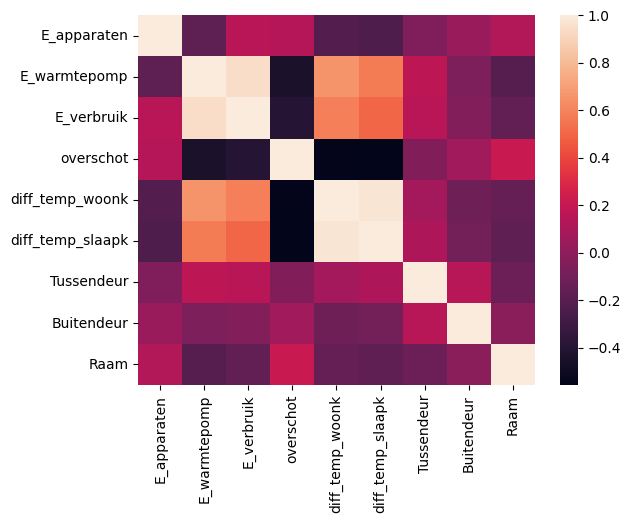

In [ ]:
# To create a nice heatmap correlation matrix, you need Seaborn.
# Here is an example using (part of) the original data set
# (because the summary doesn't have enough columns)
corr = dfhp[['E_apparaten', 'E_warmtepomp',	'E_verbruik', 'overschot', 'diff_temp_woonk', 'diff_temp_slaapk', 'Tussendeur', 'Buitendeur', 'Raam']].corr()
import seaborn as sns
sns.heatmap(corr)

There are certainly cases where a colorful correlation matrix is useful. This is not one of them (obviously total energy use - "E-verbruik" - is correlated with heat pump energy use - just as the temperature difference between the living room and the outside - diff_temp_woonk - is likely to be correlated to that in the bedroom - diff_temp_slaapk). But other than that, this correlation matrix for all the numeric values in the original data set doesn't tell us anything.

Let's return to the correlation in the summarized data set between total energy used (by the heat pump) and the average difference between living room temperature and outside temperature. It is very high (anything above .7 is high). Lazy data scientists look at this number and call it a day: heat pump energy use is strongly correlated to the difference between inside temperature and outside temperature. Done.

We, however, are not lazy data scientists. Before we make statements like this *we* want to make sure it's a good idea to calculate this correlation coefficient in the first place.

### Is the relationship linear?

Pearson's correlation coefficient measures the *linear* correlation between to sets of data points. Mathematically speaking this number is meaningless if the relationship *is not* linear.

Looking back at the scatter plot above that showed energy use versus temperature difference we can see the relationship is *somewhat* linear but not quite.

This graph clearly show that the relationship between energy used and difference with outside temperature is *not* linear. Strictly speaking we should therefore not use Pearson's correlation coefficient to calculate the correlation between the two values.

That is too bad, because if the relationship *were* linear a simple linear regression could be used to create a predictive model for this data set. As it stands, we need do some more work before we can accurately predict energy use for the heat pump in this data set.




#### QQ Plots

If the relationship between temperature difference and energy use is linear, we expect the distribution of the values among the quartiles to be the same for both variables.

To check the distribution of variables in a distribution we use something called a QQ (quantile-quantile) plot.

The statsmodels library contains a useful function for plotting a QQ-plot for a single variable. This plot shows you how the values for that variable are distributed among the percentiles / quartiles.

By default, QQ plots compare the distribution to a normal distribution. It is, however, possible, to compare your distribution to another type of distribution, such as the lognormal distribution (see below).

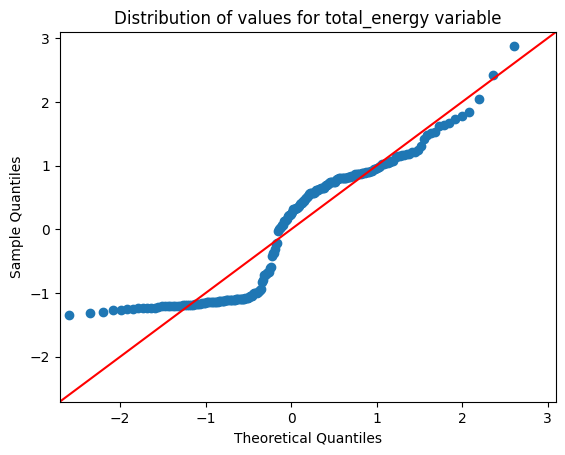

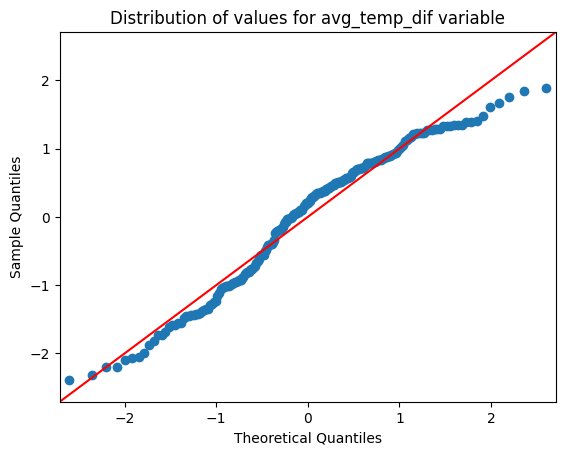

In [47]:
fig, ax = plt.subplots()

sm.qqplot(df_summ['total_energy'], line ='45', fit = True, ax = ax) 
ax.set_title('Distribution of values for total_energy variable')
plt.show()

fig, ax = plt.subplots()
sm.qqplot(df_summ['avg_temp_diff'], line ='45', fit = True, ax = ax) 
ax.set_title('Distribution of values for avg_temp_dif variable')
plt.show()




Clearly the two variables are distributed differently. It would clearly be a mistake to calculate Pearson's correlation coefficient, discover that it is high (.85) and then conclude that a simple linear regression will help us calculate energy use based on the temperature difference.



As said, it is also possible to plot distributions of our data against other types of distributions. Here is an example where the total_energy variable is plotted against a uniform distribution and against a lognormal distribution.

There is a vast list of possible distributions to use. See https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions


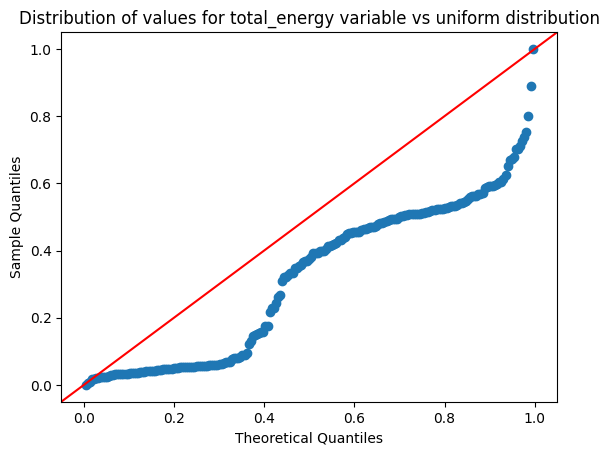

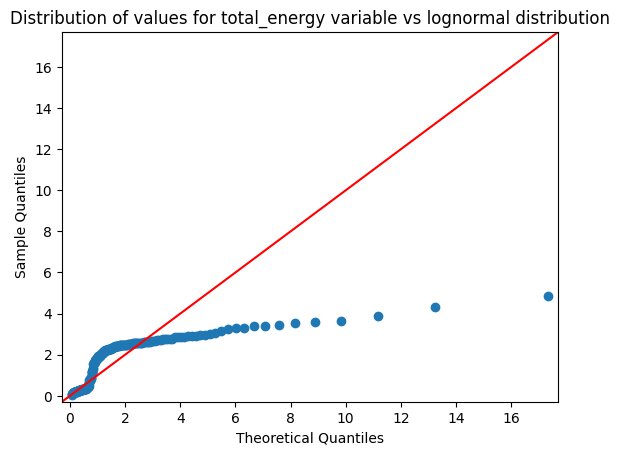

In [49]:
fig, ax = plt.subplots()

sm.qqplot(df_summ['total_energy'], line ='45', fit = True, ax = ax, dist=stats.distributions.uniform) 
ax.set_title('Distribution of values for total_energy variable vs uniform distribution')
plt.show()
fig, ax = plt.subplots()
sm.qqplot(df_summ['total_energy'], line ='45', fit = True, ax = ax, dist=stats.distributions.lognorm) 
ax.set_title('Distribution of values for total_energy variable vs lognormal distribution')
plt.show()